In [1]:
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

In [82]:
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/total_tRNA_acid_deg_oligosdegcoplex4.xlsx')
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0821.xlsx')
df = thermo_df(df)
df.shape

(5933, 5)

In [10]:
plotly_zone(df)

In [16]:
df_76_5p = pd.read_excel('~/Studio/tools/phe_76_5p.xlsx')
df_76_3p = pd.read_excel('~/Studio/tools/phe_76_3p.xlsx')
df_75_5p = pd.read_excel('~/Studio/tools/phe_75_5p.xlsx')
df_75_3p = pd.read_excel('~/Studio/tools/phe_75_3p.xlsx')
df_74_5p = pd.read_excel('~/Studio/tools/phe_74_5p.xlsx')
df_74_3p = pd.read_excel('~/Studio/tools/phe_74_3p.xlsx')

df_597_5p = pd.read_excel('~/Studio/tools/phe3_76_5p.xlsx')
df_597_3p = pd.read_excel('~/Studio/tools/phe3_76_3p.xlsx')
df_268_5p = pd.read_excel('~/Studio/tools/phe3_75_5p.xlsx')
df_268_3p = pd.read_excel('~/Studio/tools/phe3_75_3p.xlsx')

In [64]:
df_templates_5p = [df_75_5p, df_76_5p, df_268_5p, df_597_5p, df_74_5p]
df_templates_3p = [df_75_3p, df_76_3p, df_268_3p, df_597_3p, df_74_3p]

In [17]:
dfm_5ps = list()
for df_template in [df_75_5p, df_76_5p, df_268_5p, df_597_5p, df_74_5p]:
    dfm = match_dfs(df_template, df)
    dfm_5ps.append(dfm)

dfm_3ps = list()
for df_template in [df_75_3p, df_76_3p, df_268_3p, df_597_3p, df_74_3p]:
    dfm = match_dfs(df_template, df)
    dfm_3ps.append(dfm)

In [19]:
plotly_multi_zones(dfm_3ps)

In [22]:
masses_phe = [24252.311092, 24581.380920, 24252.311092-C]
masses_phe3 = [24268.30, 24597.35]
masses_phe2 = [24596.356603, 24267.306460]

In [25]:
full_mass = masses_phe[0]
df_phe75 = computational_data_seperation(dfm_5ps[0], dfm_3ps[0], full_mass, ignore_endpoints=True)

full_mass = masses_phe[1]
df_phe76 = computational_data_seperation(dfm_5ps[1], dfm_3ps[1], full_mass, ignore_endpoints=True)

full_mass = masses_phe3[0]
df_phe75_16da = computational_data_seperation(dfm_5ps[2], dfm_3ps[2], full_mass, ignore_endpoints=True)

full_mass = masses_phe3[1]
df_phe76_16da = computational_data_seperation(dfm_5ps[3], dfm_3ps[3], full_mass, ignore_endpoints=True)

full_mass = masses_phe[2]
df_phe74 = computational_data_seperation(dfm_5ps[4], dfm_3ps[4], full_mass, ignore_endpoints=True)

full_mass 24252.311092 sum_value 24270.3
full_mass 24581.38092 sum_value 24599.4
full_mass 24268.3 sum_value 24286.3
full_mass 24597.35 sum_value 24615.4
full_mass 23947.269792 sum_value 23965.3


In [37]:
df_skeleton_5ps = list()
df_skeleton_3ps = list()
for idx, full_mass in enumerate([masses_phe[0], masses_phe[1], 
                                 masses_phe3[0], masses_phe3[1], 
                                 masses_phe[2]]):
    df_skeletons = computational_data_seperation(dfm_5ps[idx], dfm_3ps[idx], 
                                                 full_mass, ignore_endpoints=True)
    df_skeleton_5ps.append(df_skeletons[0])
    df_skeleton_3ps.append(df_skeletons[1])

full_mass 24252.311092 sum_value 24270.3
full_mass 24581.38092 sum_value 24599.4
full_mass 24268.3 sum_value 24286.3
full_mass 24597.35 sum_value 24615.4
full_mass 23947.269792 sum_value 23965.3


In [48]:
# print([df.shape for df in df_gap_5ps], [df.shape for df in df_gap_3ps],
# [df.shape for df in df_skeleton_5ps], [df.shape for df in df_skeleton_3ps])

df_combined_5ps = list()
for pair in zip(df_skeleton_5ps, df_gap_5ps):
    df_combined = pd.concat(pair)
    df_combined_5ps.append(df_combined)
[df.shape for df in df_combined_5ps]

df_combined_3ps = list()
for pair in zip(df_skeleton_3ps, df_gap_3ps):
    df_combined = pd.concat(pair)
    df_combined_3ps.append(df_combined)
[df.shape for df in df_combined_3ps]

[(60, 5), (60, 5), (28, 5), (37, 5), (19, 5)]

In [50]:
plotly_multi_zones(df_combined_5ps)

In [38]:
# plotly_zones(*df_phe74)
fullmass_dot = pd.DataFrame()
# df_gap_phe74 = find_gap_dots(dfm_3ps[4], df_phe74[1], fullmass_dot, major=True, orientation=3)
# plotly_zone(df_gap_phe74)

df_gap_5ps = list()
for dfm, df_skeleton in zip(dfm_5ps, df_skeleton_5ps):
    df_gap = find_gap_dots(dfm, df_skeleton, fullmass_dot, major=True, orientation=5)
    df_gap_5ps.append(df_gap)

df_gap_3ps = list()
for dfm, df_skeleton in zip(dfm_3ps, df_skeleton_3ps):
    df_gap = find_gap_dots(dfm, df_skeleton, fullmass_dot, major=True, orientation=3)
    df_gap_3ps.append(df_gap)

Processing forward 748.06626737795
components 748.06626737795-97.9769
keep this dot 748.06626737795
297.9769 548.06626737795 0.1311219349363683 1.5626957923591935
Processing the gap 97.9769-748.06626737795, 0 dots
No dots found in these gaps.
Processing forward 2073.23872473962
components 2073.23872473962-748.06626737795
keep this dot 2073.23872473962
948.06626737795 1873.23872473962 1.843222174798421 5.5286499057024985
Processing the gap 748.06626737795-2073.23872473962, 1 dots
extend dots              Mass        RT         Vol        RA        FA
961  1438.161359  2.323084  1015882.69  0.265553  0.021176
Processing forward 2073.24222578262
Processing forward 2685.28865536746
components 2685.28865536746-2073.23872473962
keep this dot 2685.28865536746
2273.23872473962 2485.28865536746 5.902104622125796 8.18636211667043
Processing the gap 2073.23872473962-2685.28865536746, 1 dots
extend dots               Mass        RT        Vol        RA        FA
1304  2379.263242  7.153109  599289

keep this dot 19249.5833092559
18800.4828723446 19049.5833092559 20.663062799853197 21.004128821943088
Processing the gap 18600.4828723446-19249.5833092559, 1 dots
extend dots                Mass         RT        Vol        RA        FA
4672  18943.540972  20.798762  761111.14  0.198956  0.015865
Processing forward 19554.618685581
Processing forward 20188.7212416633
components 20188.7212416633-19249.5833092559
keep this dot 20188.7212416633
19449.5833092559 19988.7212416633 20.606181286548235 21.13069049354528
Processing the gap 19249.5833092559-20188.7212416633, 2 dots
reserved masses:  [19554.618685581, 19859.7009849325]
extend dots                Mass         RT         Vol        RA        FA
4697  19554.618686  20.868429  2626999.57  0.686702  0.054759
4708  19859.700985  20.868429  3519965.21  0.920124  0.073373
Processing forward 20493.7748908666
Processing forward 20822.8276750489
components 20822.8276750489-20188.7212416633
keep this dot 20822.8276750489
20388.7212416633 2062

17524.3354553736 17750.384118031 20.39549445486776 20.853930142888355
Processing the gap 17324.3354553736-17950.384118031, 1 dots
extend dots                Mass         RT         Vol        RA        FA
4629  17644.367967  20.659484  5526890.47  1.444738  0.115207
Processing forward 18255.4403675025
Processing forward 18600.4828723446
components 18600.4828723446-17950.384118031
keep this dot 18600.4828723446
18150.384118031 18400.4828723446 20.475554592161863 21.05235897142346
Processing the gap 17950.384118031-18600.4828723446, 1 dots
extend dots                Mass         RT        Vol        RA        FA
4650  18255.440368  20.729081  5748872.5  1.502764  0.119834
Processing forward 18943.5409719727
Processing forward 19249.5833092559
components 19249.5833092559-18600.4828723446
keep this dot 19249.5833092559
18800.4828723446 19049.5833092559 20.663062799853197 21.004128821943088
Processing the gap 18600.4828723446-19249.5833092559, 1 dots
extend dots                Mass         

keep this dot 6614.83756941753
6124.74304733118 6414.83756941753 15.110338211894492 15.71137140422609
Processing the gap 5924.74304733118-6614.83756941753, 1 dots
extend dots               Mass         RT         Vol        RA        FA
2994  6269.790345  15.479443  11563198.7  3.022638  0.241032
Processing forward 7288.93766922055
components 7288.93766922055-6614.83756941753
keep this dot 7288.93766922055
6814.83756941753 7088.93766922055 15.814000186934862 16.407641795795346
Processing the gap 6614.83756941753-7288.93766922055, 1 dots
extend dots               Mass         RT         Vol        RA        FA
3231  6943.889703  16.177119  8728034.88  2.281522  0.181934
Processing forward 9580.29372044256
components 9580.29372044256-7288.93766922055
keep this dot 9580.29372044256
7488.93766922055 9380.29372044256 16.496027111660272 18.103754511957522
Processing the gap 7288.93766922055-9580.29372044256, 5 dots
reserved masses:  [8641.16944021104, 7963.03911338286, 8946.19777607231, 8268

reserved masses:  [2685.28865536746, 2379.26324184422, 3373.40684206925, 3678.44940947317]
extend dots               Mass         RT          Vol        RA        FA
1304  2379.263242   7.153109    599289.48  0.156655  0.012492
1381  2685.288655   8.409412    570222.57  0.149057  0.011886
1559  3373.406842  10.091664  20413407.28  5.336097  0.425513
1688  3678.449409  10.016964  29922578.80  7.821809  0.623729
Processing forward 7963.03911338286
Processing forward 8641.16944021104
components 8641.16944021104-7963.03911338286
keep this dot 8641.16944021104
8163.03911338286 8441.16944021104 17.07070609118948 17.667752690386717
Processing the gap 7963.03911338286-8641.16944021104, 1 dots
extend dots               Mass         RT         Vol        RA        FA
3589  8268.081367  17.160075  7996620.34  2.090329  0.166688
Processing forward 8946.19777607231
Processing forward 11896.6405101561
Processing forward 13062.8008295174
components 13062.8008295174-11896.6405101561
keep this dot 1306

keep this dot 8567.19067928201
8142.10882108886 8367.19067928201 15.883516323377252 16.409278900748944
Processing the gap 7942.10882108886-8567.19067928201, 1 dots
extend dots               Mass         RT        Vol        RA        FA
3584  8248.135688  16.111155  6999466.9  1.829672  0.145902
Processing forward 8872.23168063945
Processing forward 9178.26088909682
components 9178.26088909682-8567.19067928201
keep this dot 9178.26088909682
8767.19067928201 8978.26088909682 16.494026786115946 16.848536413022657
Processing the gap 8567.19067928201-9178.26088909682, 1 dots
extend dots               Mass         RT         Vol        RA        FA
3728  8872.231681  16.671277  6120764.76  1.599978  0.127586
Processing forward 9537.32285160016
Processing forward 9882.378068858
components 9882.378068858-9178.26088909682
keep this dot 9882.378068858
9378.26088909682 9682.378068858 16.902879221821003 17.140415000470302
Processing the gap 9178.26088909682-9882.378068858, 1 dots
extend dots     

2667.39627933069 2902.46670583807 0.9493962323819574 6.553829347610968
Processing the gap 2467.39627933069-3102.46670583807, 0 dots
No dots found in these gaps.
Processing forward 3102.47429217397
Processing forward 3431.52685744218
Processing forward 3776.56716316854
components 3776.56716316854-3102.46670583807
keep this dot 3776.56716316854
3302.46670583807 3576.56716316854 7.026001657131557 6.434247082524255
Processing the gap 3102.46670583807-3776.56716316854, 0 dots
No dots found in these gaps.
Processing forward 3776.57527725081
Processing forward 4105.61644927097
Processing forward 4105.6208347062
Processing forward 4410.66113792681
components 4410.66113792681-3776.56716316854
keep this dot 4410.66113792681
3976.56716316854 4210.66113792681 6.663992684900618 9.668625379916191
Processing the gap 3776.56716316854-4410.66113792681, 0 dots
No dots found in these gaps.
Processing forward 4739.71037591988
Processing forward 5044.75019297497
components 5044.75019297497-4410.66113792681

keep this dot 19635.7518442793
18874.6289388775 19435.7518442793 20.32403646749073 20.78632362158878
Processing the gap 18674.6289388775-19635.7518442793, 1 dots
extend dots                Mass         RT       Vol       RA        FA
4676  19019.671008  20.659484  399538.8  0.10444  0.008328
Processing forward 19980.8374993644
Processing forward 20920.9350393239
components 20920.9350393239-19635.7518442793
keep this dot 20920.9350393239
19835.7518442793 20720.9350393239 20.40348575114886 21.12456386401174
Processing the gap 19635.7518442793-20920.9350393239, 2 dots
reserved masses:  [20309.8177242671, 19980.8374993644]
extend dots                Mass         RT         Vol        RA        FA
4709  19980.837499  20.729081  3599305.81  0.940864  0.075027
4718  20309.817724  20.798762  1192328.04  0.311676  0.024854
Processing forward 21585.0585044303
components 21585.0585044303-20920.9350393239
keep this dot 21585.0585044303
21120.9350393239 21385.0585044303 20.743347008930463 21.202440

Processing forward 9882.378068858
components 9882.378068858-9217.27449676157
keep this dot 9882.378068858
9417.27449676157 9682.378068858 16.969198285995247 17.144558945971458
Processing the gap 9217.27449676157-9882.378068858, 1 dots
extend dots               Mass         RT        Vol        RA        FA
3864  9523.316387  17.089507  284434.45  0.074352  0.005929
Processing forward 10227.4348262417
Processing forward 10556.4692771647
components 10556.4692771647-9882.378068858
keep this dot 10556.4692771647
10082.378068858 10356.4692771647 16.985912855718073 17.68258150903631
Processing the gap 9882.378068858-10556.4692771647, 1 dots
extend dots                Mass         RT        Vol        RA        FA
3974  10227.434826  17.366981  527537.49  0.137899  0.010996
Processing forward 10901.5151358865
Processing forward 11552.6162208689
components 11552.6162208689-10556.4692771647
keep this dot 11552.6162208689
10756.4692771647 11352.6162208689 17.329579535024493 18.108827388523896
Pr

In [51]:
df_phe75_rev = df_combined_3ps[0].copy()
df_phe75_rev.Mass = df_75_5p.Mass.max() - df_phe75_rev.Mass
df_phe75_rev = df_phe75_rev[df_phe75_rev.Mass>200]

df_phe76_rev = df_combined_3ps[1].copy()
df_phe76_rev.Mass = df_76_5p.Mass.max() - df_phe76_rev.Mass
df_phe76_rev = df_phe76_rev[df_phe76_rev.Mass>200]

df_phe75_16da_rev = df_combined_3ps[2].copy()
df_phe75_16da_rev.Mass = df_268_5p.Mass.max() - df_phe75_16da_rev.Mass
df_phe75_16da_rev = df_phe75_16da_rev[df_phe75_16da_rev.Mass>200]

df_phe76_16da_rev = df_combined_3ps[3].copy()
df_phe76_16da_rev.Mass = df_597_5p.Mass.max() - df_phe76_16da_rev.Mass
df_phe76_16da_rev = df_phe76_16da_rev[df_phe76_16da_rev.Mass>200]

df_phe74_rev = df_combined_3ps[4].copy()
df_phe74_rev.Mass = df_74_5p.Mass.max() - df_phe74_rev.Mass
df_phe74_rev = df_phe74_rev[df_phe74_rev.Mass>200]

In [52]:
df_revs = [df_phe75_rev, df_phe76_rev, df_phe75_16da_rev, df_phe76_16da_rev, df_phe74_rev]


0 (61, 5)
1 (66, 5)
2 (37, 5)
3 (51, 5)
4 (27, 5)
5 (60, 5)
6 (60, 5)
7 (26, 5)
8 (35, 5)
9 (12, 5)
(261, 7)


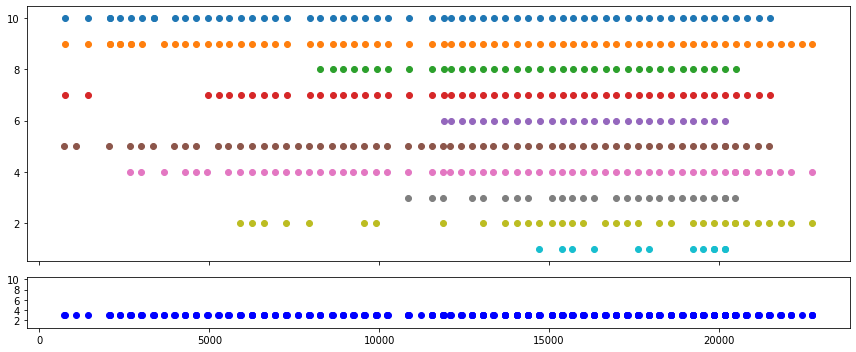

In [58]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 5), 
                               sharex=True, sharey=True, 
                               gridspec_kw={'height_ratios': [5, 1]})

# dfs = [
#        (dfm_5ps[0], "24252 5'"),
#        (dfm_5ps[1], "24581 5'"),
#        (dfm_5ps[2], "24268 5'"),
#        (dfm_5ps[3], "24597 5'"),
#        (dfm_5ps[4], "23947 5'"),
       
#        (dfm_3ps[0], "24252 3' --> 5'"),
#        (dfm_3ps[1], "24581 3' --> 5'"),
#        (dfm_3ps[2], "24268 3' --> 5'"),
#        (dfm_3ps[3], "24597 3' --> 5'"),
#        (dfm_3ps[4], "23947 3' --> 5'"),
#       ] 

dftmp1 = df_combined_5ps[4].copy()
dftmp1 = dftmp1[dftmp1.Mass>10000]
dftmp2 = df_revs[2].copy()
dftmp2 = dftmp2[dftmp2.Mass>10000]
dftmp3 = df_revs[3].copy()
dftmp3 = dftmp3[dftmp3.Mass>5000]
dftmp4 = df_revs[4].copy()
dftmp4 = dftmp4[dftmp4.Mass>14000]
dfs = [
       (df_combined_5ps[0], "24252 5'"),
       (df_combined_5ps[1], "24581 5'"),
       (df_combined_5ps[2], "24268 5'"),
       (df_combined_5ps[3], "24597 5'"),
       (dftmp1, "23947 5'"),
       
       (df_revs[0], "24252 3' --> 5'"),
       (df_revs[1], "24581 3' --> 5'"),
       (dftmp2, "24268 3' --> 5'"),
       (dftmp3, "24597 3' --> 5'"),
       (dftmp4, "23947 3' --> 5'"),
      ] 

total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    print(idx, df_iso.shape)
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)

df_merge_5p = pd.concat(df_isoforms).drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')

# df_merge_5p = pd.concat(df_isoforms)
# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/tRNA_phe_complement.svg', transparent=True, dpi=300)

In [60]:
df_revs[0].Mass.min()

730.0750856640079

In [92]:
df_olis1 = pd.read_excel('/Users/bryan/Downloads/Phe_dataset/Sample#2_oligossample2charge1.xlsx')
df_olis2 = pd.read_excel('/Users/bryan/Downloads/Phe_dataset/Sample#2_oligosdegradsample2.xlsx')
df_0724 = pd.read_excel('/Users/bryan/Downloads/Phe_dataset/tRNA_Phe_0724.xlsx')
df_0821 = pd.read_excel('/Users/bryan/Downloads/Phe_dataset/tRNA_Phe_0821.xlsx')
df_sn2 = pd.read_excel('/Users/bryan/Documents/MLCSeq/DataSrc/NY/phe/tRNA_AcidDeg_SN2.xlsx')
df_olis1 = thermo_df(df_olis1)
df_olis2 = thermo_df(df_olis2)
df_0724 = thermo_df(df_0724)
df_0821 = thermo_df(df_0821)
df_sn2 = thermo_df(df_sn2)

In [85]:
plotly_multi_zones(dfm_5ps)

In [93]:
dfm_5ps = list()
dfm_3ps = list()
dfm_3ps_rev = list()
df_sample = df_sn2.copy()
for df_template in df_templates_5p:
    dfm = match_dfs(df_template, df_sample)
    dfm_5ps.append(dfm)

for df_template in df_templates_3p:
    dfm = match_dfs(df_template, df_sample)
    dfm_3ps.append(dfm)
    
    dfm_rev = dfm.copy()
    dfm_rev.Mass = df_template.Mass.max() + H2O - dfm_rev.Mass
    dfm_rev = dfm_rev[dfm_rev.Mass>200]
    dfm_3ps_rev.append(dfm_rev)

0 (14, 5)
1 (14, 5)
2 (14, 5)
3 (14, 5)
4 (14, 5)
5 (1, 5)
6 (0, 5)
7 (7, 5)
8 (4, 5)
9 (3, 5)
(29, 7)


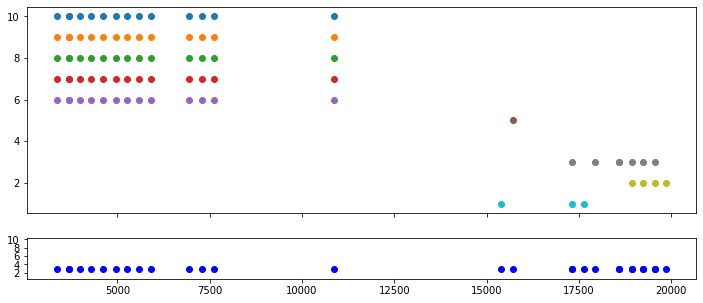

In [99]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 5), 
                               sharex=True, sharey=True, 
                               gridspec_kw={'height_ratios': [5, 1]})

dfs = [
       (dfm_5ps[0], "24252 5'"),
       (dfm_5ps[1], "24581 5'"),
       (dfm_5ps[2], "24268 5'"),
       (dfm_5ps[3], "24597 5'"),
       (dfm_5ps[4], "23947 5'"),
       
       (dfm_3ps_rev[0], "24252 3' --> 5'"),
       (dfm_3ps_rev[1], "24581 3' --> 5'"),
       (dfm_3ps_rev[2], "24268 3' --> 5'"),
       (dfm_3ps_rev[3], "24597 3' --> 5'"),
       (dfm_3ps_rev[4], "23947 3' --> 5'"),
      ] 

total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    print(idx, df_iso.shape)
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)

df_merge_5p = pd.concat(df_isoforms).drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')

# df_merge_5p = pd.concat(df_isoforms)
# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

# fig.tight_layout()
# plt.savefig('/Users/bryan/Downloads/tRNA_phe_olis2c1_complement.svg', transparent=True, dpi=300)

0 (14, 5)
1 (14, 5)
2 (14, 5)
3 (14, 5)
4 (14, 5)
5 (1, 5)
6 (0, 5)
7 (7, 5)
8 (4, 5)
9 (3, 5)
(29, 7)


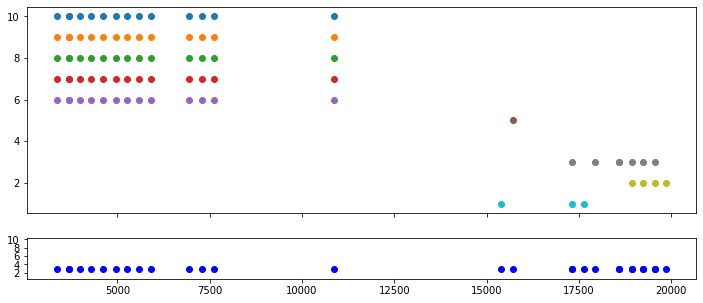

In [94]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 5), 
                               sharex=True, sharey=True, 
                               gridspec_kw={'height_ratios': [5, 1]})

dfs = [
       (dfm_5ps[0], "24252 5'"),
       (dfm_5ps[1], "24581 5'"),
       (dfm_5ps[2], "24268 5'"),
       (dfm_5ps[3], "24597 5'"),
       (dfm_5ps[4], "23947 5'"),
       
       (dfm_3ps_rev[0], "24252 3' --> 5'"),
       (dfm_3ps_rev[1], "24581 3' --> 5'"),
       (dfm_3ps_rev[2], "24268 3' --> 5'"),
       (dfm_3ps_rev[3], "24597 3' --> 5'"),
       (dfm_3ps_rev[4], "23947 3' --> 5'"),
      ] 

total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    print(idx, df_iso.shape)
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)

df_merge_5p = pd.concat(df_isoforms).drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')

# df_merge_5p = pd.concat(df_isoforms)
# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

# fig.tight_layout()
# plt.savefig('/Users/bryan/Downloads/tRNA_phe_olis2c1_complement.svg', transparent=True, dpi=300)

In [4]:
df_control = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/oligossample1.xlsx')
df_control = thermo_df(df_control)

In [103]:
plotly_zone(df_control[df_control.Mass>23900], y='Vol')

In [3]:
df_tmp = pd.DataFrame()
df_tmp['Mass'] = [24610.49, 24939.55, 24626.46, 24955.52, 24305.4]

In [6]:
dfm = match_dfs(df_tmp, df_control)
# dfm['Ratio'] = dfm
dfm['Ratio'] = dfm.Vol / dfm.Vol.max()
dfm

,Mass,RT,Vol,RA,FA,Ratio
0,24610.491082,3.999467,1.607808e+08,100.000000,40.569264,1.000000
1,24939.547815,3.999467,9.606786e+07,59.750820,24.240467,0.597508
2,24626.463865,3.999467,2.370173e+07,14.741640,5.980575,0.147416
3,24955.522441,4.023968,1.215045e+07,7.557149,3.065880,0.075571
8,24305.403167,3.999467,2.735696e+06,1.701506,0.690289,0.017015


In [109]:
dfm.to_excel('~/Downloads/phe_homology_control_data.xlsx')